In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from tqdm import tqdm



import os

        
directories = [
    'enrondataset\enron1\ham',
    'enrondataset\enron1\spam',
    'enrondataset\enron2\ham',
    'enrondataset\enron2\spam',
    'enrondataset\enron3\ham',
    'enrondataset\enron3\spam',
    'enrondataset\enron4\ham',
    'enrondataset\enron4\spam',
    'enrondataset\enron5\ham',
    'enrondataset\enron5\spam',
    'enrondataset\enron6\ham',
    'enrondataset\enron7\spam'
]

def get_data_from_directories(directories):
    combined_data = []
    
    for directory in directories:
        label = os.path.basename(directory)  # Extract the directory name as the label
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='ISO-8859-1') as f:
                    content = f.read()
                    combined_data.append({'text': content, 'label': label})
    
    return combined_data

# Get data from all directories
combined_data = get_data_from_directories(directories)

# Shuffle the combined data (optional step)
np.random.shuffle(combined_data)

# Create a DataFrame
df = pd.DataFrame(combined_data)


# Check the first few rows of the DataFrame
df.head()

,text,label
0,Subject: \n( envelope - from 20040929124340 . ...,spam
1,Subject: hi paliourg software cds 15 and 99 ge...,spam
2,Subject: out of office autoreply : just to her...,spam
3,"Subject: re : sorry .\nchonawee ,\nthis was pe...",ham
4,"Subject: allas , plnnacle system , apple , cor...",spam


,text,label,extracted_info,sender,recipient,subject,date,content,length
0,Subject: \n( envelope - from 20040929124340 . ...,1,"{'sender': '', 'recipient': '', 'subject': '',...",,,,,( envelope - from 20040929124340 . cca 9726591...,946
1,Subject: hi paliourg software cds 15 and 99 ge...,1,"{'sender': '', 'recipient': '', 'subject': 'hi...",,,hi paliourg software cds 15 and 99 get al soft...,,hi paliourg !monsters dlscountsup to 90 % only...,1309
2,Subject: out of office autoreply : just to her...,1,"{'sender': '', 'recipient': '', 'subject': 'ou...",,,out of office autoreply : just to her . . .,,i am on vacation week 29 + 30 + 31 . please co...,222
3,"Subject: re : sorry .\nchonawee ,\nthis was pe...",0,"{'sender': '', 'recipient': '', 'subject': 're...",,,re : sorry .,,"chonawee ,this was perfectly all right . as a ...",1497
4,"Subject: allas , plnnacle system , apple , cor...",1,"{'sender': '', 'recipient': '', 'subject': 'al...",,,"allas , plnnacle system , apple , corel , nero...",,.super cheaap softwares & shiiip to all countr...,671


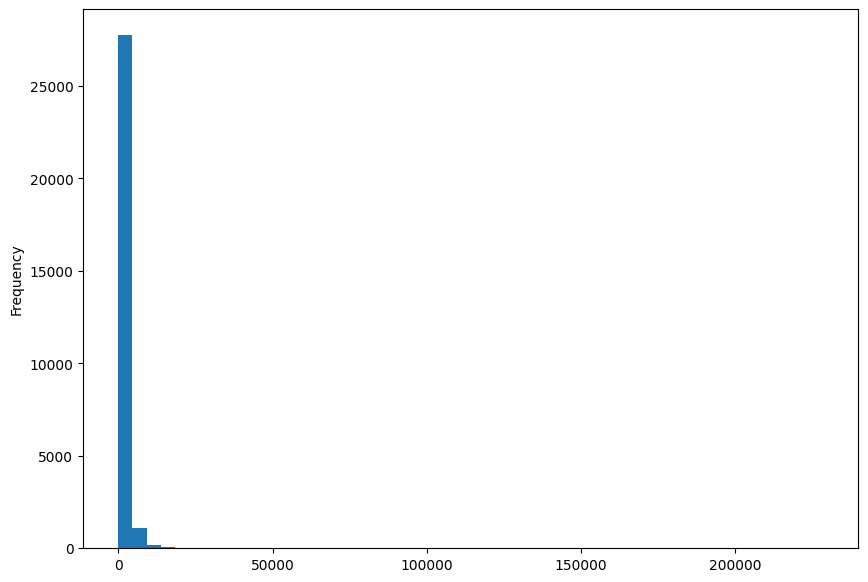

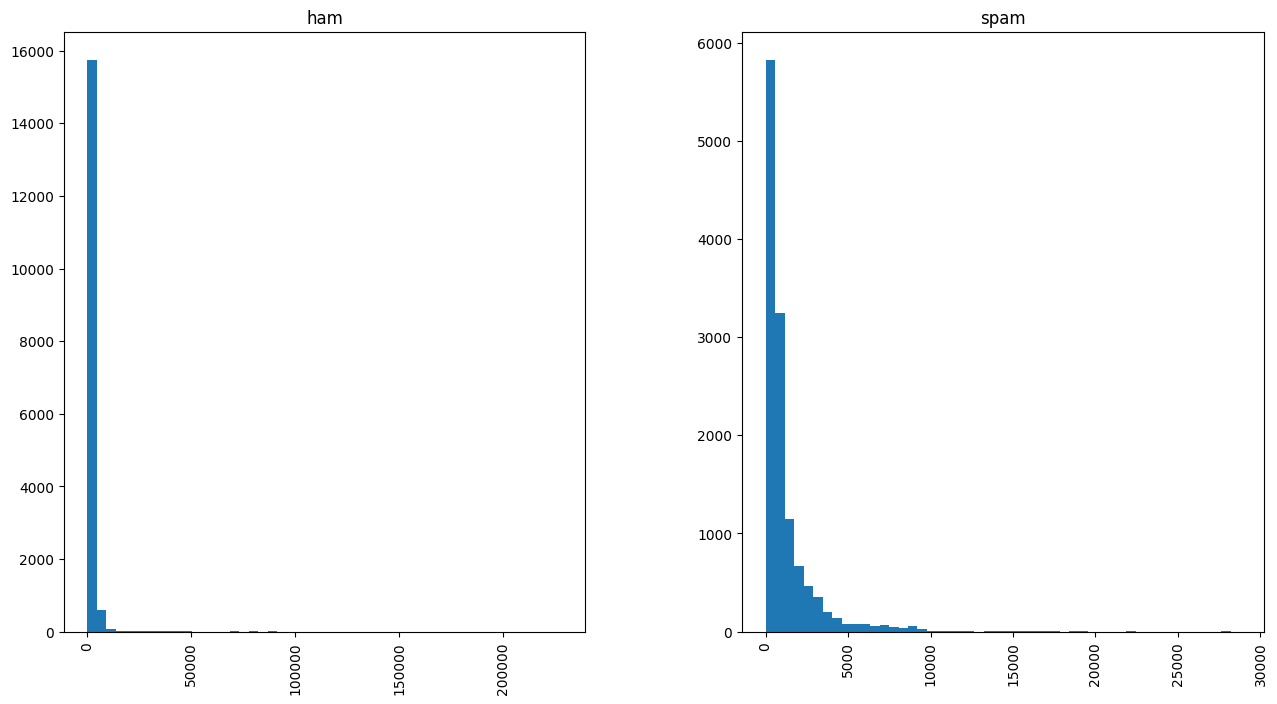

In [2]:
def extract_email_info(email_text):
    lines = email_text.split('\n')

    content = ''
    sender = ''
    recipient = ''
    subject = ''
    date = ''

    for line in lines:
        if line.startswith('Subject:'):
            subject = line.replace('Subject:', '').strip()
        elif line.startswith('From:'):
            sender = line.replace('From:', '').strip()
        elif line.startswith('To:'):
            recipient = line.replace('To:', '').strip()
        elif line.startswith('Date:'):
            date = line.replace('Date:', '').strip()
        elif line.startswith('Date:'):
            date = line.replace('Received:', '').strip()
        elif line.startswith('X-'):
            continue
        else:
            content += line.strip()

    return {'sender': sender, 'recipient': recipient, 
            'subject': subject, 'date': date, 'content': content}

# Applying the function to the DataFrame
df['extracted_info'] = df['text'].apply(extract_email_info)

# Creating new columns based on extracted information
df[['sender', 'recipient', 'subject', 'date', 'content']] = df['extracted_info'].apply(pd.Series)

# Dropping unnecessary columns
#df.drop(['text', 'extracted_info'], axis=1, inplace=True)

# Displaying the modified DataFrame
df.head()
    

df['length']=df['text'].apply(len)
df.head()


df['length'].plot(bins=50, kind='hist',figsize=(10,7))

df.hist(column='length', by='label', bins=50, figsize=(15,8))

df.loc[:,'label']=df.label.map({'ham':0, 'spam':1})
# df.to_csv('/kaggle/working/combined_data.csv', index=False)
df.head()

- CountVectorizer is used to convert a collection of text documents to a matrix of token counts. This step essentially transforms text data into numerical data, which can be used for machine learning algorithms.

- Explanation: Each unique word in the text data will be assigned a feature (column) in the resulting matrix, with the value in each cell representing the count of that word in a particular document.

- Explanation:
fit learns the vocabulary dictionary of all tokens in the raw documents.
transform converts the documents to a document-term matrix.

In [3]:
count=CountVectorizer()

text=count.fit_transform(df['text']) #covert document to matrix token

#split dataset into training and testing
x_train, x_test, y_train, y_test, train_idx, test_idx = train_test_split(
    text, df['label'], df.index, test_size=0.20, random_state=1
)


print(x_train.shape)
print(x_test.shape)

(23372, 139347)
(5843, 139347)


In [4]:
text

<29215x139347 sparse matrix of type '<class 'numpy.int64'>'
	with 3444796 stored elements in Compressed Sparse Row format>

In [5]:
model1 = MultinomialNB() #Create model
# model2=  GaussianNB()

In [6]:
model1.fit(x_train.toarray(), y_train.astype('int')) #train model
y_pred = model1.predict(x_test.toarray()) #predict result by chging it into array

#create a report to evaluate our model
print("Classification Report:")
print(classification_report(y_test.astype('int'), y_pred.astype('int')))
print("Confusion Matrix:")
print(confusion_matrix(y_test.astype('int'), y_pred.astype('int')))
print("\n")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3345
           1       0.98      0.99      0.98      2498

    accuracy                           0.99      5843
   macro avg       0.99      0.99      0.99      5843
weighted avg       0.99      0.99      0.99      5843

Confusion Matrix:
[[3295   50]
 [  33 2465]]




In [7]:
y_pred_proba = model1.predict_proba(x_test.toarray())

In [8]:
feature_names = count.get_feature_names_out()


Get top features to analyze our model see which features is more indicative to our model (Check txtfile for features)

In [9]:
# Get the top features for each class
top_n = 20  # Number of top features to display
class_labels = model1.classes_
top_features = {}

In [10]:
for i, class_label in enumerate(class_labels):
    top_indices = model1.feature_log_prob_[i].argsort()[-top_n:]
    top_features[class_label] = [(feature_names[j], model1.feature_log_prob_[i][j]) for j in top_indices]

# Save the details in a DataFrame
results_df = pd.DataFrame({
    'email_text': df.iloc[y_test.index]['text'],
    'actual_label': y_test.values,
    'predicted_label': y_pred,
    'spam_probability': y_pred_proba[:, 1],  # Probability of being spam
    'not_spam_probability': y_pred_proba[:, 0]  # Probability of not being spam
})

# Save misclassified instances
misclassified_df = results_df[results_df['actual_label'] != results_df['predicted_label']]

# Save to CSV
results_df.to_csv('classification_results.csv', index=False)
misclassified_df.to_csv('misclassified_emails.csv', index=False)

# Save top features for each class
with open('top_features.txt', 'w') as f:
    for class_label, features in top_features.items():
        f.write(f"Top features for class {class_label}:\n")
        for feature, coef in features:
            f.write(f"{feature}: {coef}\n")
        f.write("\n")

In [11]:
# Create DataFrames for top features
top_features_class_0 = pd.DataFrame(top_features[0], columns=['Feature', 'Log Probability'])
top_features_class_1 = pd.DataFrame(top_features[1], columns=['Feature', 'Log Probability'])

# Save to CSV files
top_features_class_0.to_csv('top_features_class_0.csv', index=False)
top_features_class_1.to_csv('top_features_class_1.csv', index=False)


In [13]:


# Select 10 random indices from the test set for display
import random
random.seed(1)  # Setting seed for reproducibility
indices_to_display = random.sample(range(len(y_test)), 10)

# Print results for the selected indices
for idx in indices_to_display:
    print(f"Email {idx + 1}:")
    print(f"Predicted Label: {'spam' if y_pred[idx] == 1 else 'ham'}")  # Predicted label
    print(f"Actual Label: {'spam' if y_test.iloc[idx] == 1 else 'ham'}")  # Actual label from y_test
    print(f"Subject: {df.iloc[idx]['subject']}")  # Subject of the email
    print(f"Sender: {df.iloc[idx]['sender']}")    # Sender of the email
    print(f"Recipient: {df.iloc[idx]['recipient']}")  # Recipient of the email
    print(f"Date: {df.iloc[idx]['date']}")  # Date of the email
    print(f"Content:\n{df.iloc[idx]['content']}")  # Content of the email
    print("\n")


Email 1101:
Predicted Label: ham
Actual Label: ham
Subject: managing director and vice president elections
Sender: 
Recipient: 
Date: 
Content:
the managing director prc committee met this week to elect individuals tomanaging director and vice president positions . these employees arerecognized as outstanding contributors to the organization , whose individualefforts have been instrumental in the continued success and growth of thecompany . we are pleased to announce the election of the following newmanaging directors and vice presidents . please join us in congratulatingthese individuals on their new appointments .managing director  ) commercialphillip k . allen , ena ( ews ) west gas trading - houstonfranklin r . bay , ebs entertainment on demand - houstontimothy n . belden , ena ( ews )  ) west power trading - portlandmichael r . brown , eel  ) executive - londonchristopher f . calger , ena ( ews ) west power origination - portlandjoseph m . deffner , ena ( ews ) treasury & fundi

In [14]:
import os
import shutil

# Paths to your folders
spam_folder = 'spam'
ham_folder = 'ham'

# Iterate through emails in the test set and save based on predicted labels
for idx, (email_index, label) in enumerate(zip(test_idx, y_pred)):
    email_text = df.loc[email_index, 'text']  # Access the original email text
    
    # Determine the folder path based on the label
    if label == 1:  # Spam
        save_path = os.path.join(spam_folder, f'email_{idx}.txt')
    else:  # Not spam (ham)
        save_path = os.path.join(ham_folder, f'email_{idx}.txt')
    
    # Write the email content to the appropriate folder
    with open(save_path, 'w', encoding='utf-8') as file:
        file.write(email_text)


In [15]:

test_email_text = "Hello, My name is Boon Tatt"

# Preprocess and vectorize your email text
email_vector = count.transform([test_email_text])

# Make prediction
prediction = model1.predict(email_vector.toarray())

# Interpret the prediction
if prediction[0] == 1:
    print("Your email is classified as spam.")
else:
    print("Your email is classified as not spam (ham).")


Your email is classified as spam.


In [16]:
def checkSpam(df):
    if df.empty or 'email_text' not in df.columns:
        raise ValueError("DataFrame is empty or does not contain 'email_text' column.")
    
    email_text = df.iloc[0]['email_text']
    email_vector = count.transform([email_text])
    prediction = model1.predict(email_vector.toarray())
    return prediction[0] == 1  # Return True if spam, False otherwise

data = {
    'email_text': [
        "Subject: Do you have student discounts for the Annual Coding Conference? Greetings, I would like to ask if you provide student discounts for tickets to the Annual Coding Conference. I’m a full-time student at the University of Texas and I’m very excited about your event, but unfortunately, the ticket price is too high for me. I would appreciate if you could offer me an educational discount. Looking forward to hearing from you! Best, [Your name]"
    ]
}
df = pd.DataFrame(data)

# Check if the email in the DataFrame is spam
is_spam = checkSpam(df)
print(is_spam)  # Output will be False (or True if it's classified as spam)

False


In [17]:
import pickle


In [ ]:
# Save the model to a file
with open('spam_classifier_model.pkl', 'wb') as file:
    pickle.dump(model1, file)

# Save the CountVectorizer to a file
with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(count, file)
